Metro Operations Optimization: Getting Started
The problem I am working on in this article is my take on a problem statement I found at statso. The dataset contains several files, as follows:

Agency: Information about the Delhi Metro Rail Corporation, including name, URL, and contact details.
Calendar: Service schedules delineating the operation days (weekdays, weekends) and valid dates for these schedules.
Routes: Details of metro routes, including short and long names, type of route, and descriptions.
Shapes: Geographical coordinates of routes, providing the precise paths taken by the metro lines.
Stop Times: Timetables for each trip indicating arrival and departure times at specific stops.
Stops: Locations of metro stops, including latitude and longitude coordinates.
Trips: Information linking trips to routes, including details like trip identifiers and associated route IDs.


In [2]:
pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# load all the data files
agency = pd.read_csv('C:/Users/mahes/OneDrive/Documents/DS_Projects/DMRC_GTFS/agency.txt')
calendar = pd.read_csv('C:/Users/mahes/OneDrive/Documents/DS_Projects/DMRC_GTFS/calendar.txt')
routes = pd.read_csv('C:/Users/mahes/OneDrive/Documents/DS_Projects/DMRC_GTFS/routes.txt')
shapes = pd.read_csv('C:/Users/mahes/OneDrive/Documents/DS_Projects/DMRC_GTFS/shapes.txt')
stop_times = pd.read_csv('C:/Users/mahes/OneDrive/Documents/DS_Projects/DMRC_GTFS/stop_times.txt')
stops = pd.read_csv('C:/Users/mahes/OneDrive/Documents/DS_Projects/DMRC_GTFS/stops.txt')
trips = pd.read_csv('C:/Users/mahes/OneDrive/Documents/DS_Projects/DMRC_GTFS/trips.txt')

# show the first few rows and the structure of each dataframe
data_overviews = {
    "agency": agency.head(),
    "calendar": calendar.head(),
    "routes": routes.head(),
    "shapes": shapes.head(),
    "stop_times": stop_times.head(),
    "stops": stops.head(),
    "trips": trips.head()
}

data_overviews

{'agency':   agency_id                   agency_name                      agency_url  \
 0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   
 
   agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
 0    Asia/Kolkata          NaN           NaN              NaN           NaN  ,
 'calendar':   service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
 0    weekday       1        1          1         1       1         0       0   
 1   saturday       0        0          0         0       0         1       0   
 2     sunday       0        0          0         0       0         0       1   
 
    start_date  end_date  
 0    20190101  20251231  
 1    20190101  20251231  
 2    20190101  20251231  ,
 'routes':    route_id  agency_id route_short_name  \
 0        33        NaN           R_SP_R   
 1        31        NaN           G_DD_R   
 2        29        NaN           P_MS_R   
 3        12        NaN             M_JB

Let’s start by analyzing the routes and operations of Delhi Metro to understand how it operates. We’ll start by:

Plotting the geographical routes on a map to visualize the network.
Examining the frequency and scheduling of trips across different days of the week.
Analyzing coverage by examining the distribution of stops and their connectivity.
I’ll start by plotting the geographical paths of different routes on a map to visualize how the Delhi Metro covers the area:

In [4]:
! pip install matplotlib
! pip install seaborn

  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


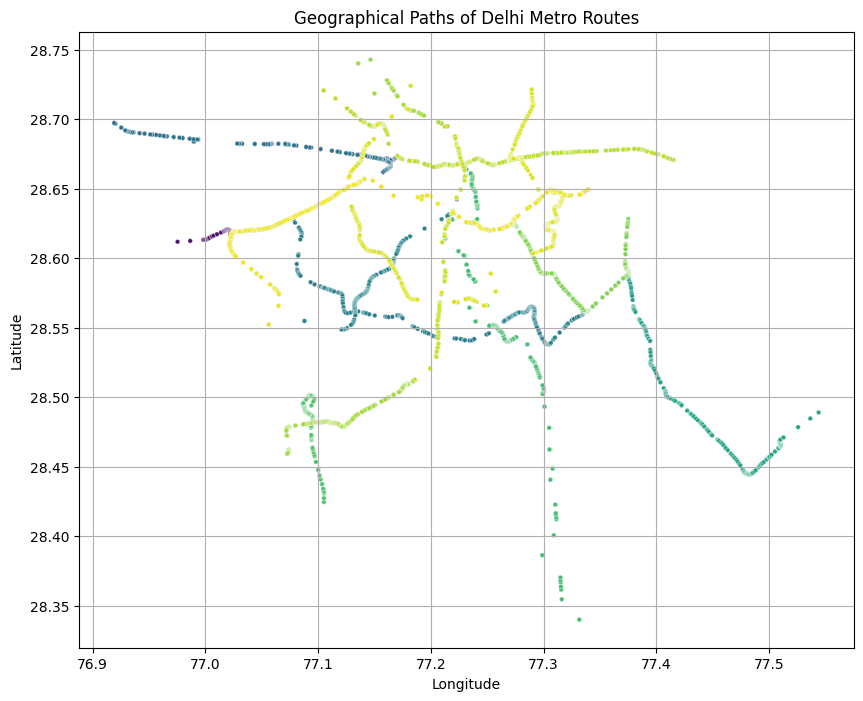

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='shape_pt_lon', y='shape_pt_lat', hue='shape_id', data=shapes, palette='viridis', s=10, legend=None)
plt.title('Geographical Paths of Delhi Metro Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

The map visualization shows the geographical paths of the Delhi Metro routes. Each line (identified by a unique colour) represents the path of a different route defined in the shapes dataset. This visual helps to understand how the Metro covers the geographical area of Delhi, demonstrating the connectivity and spread of the network.
Next, I will examine the frequency and scheduling of trips across different days of the week by analyzing the calendar and trip data:


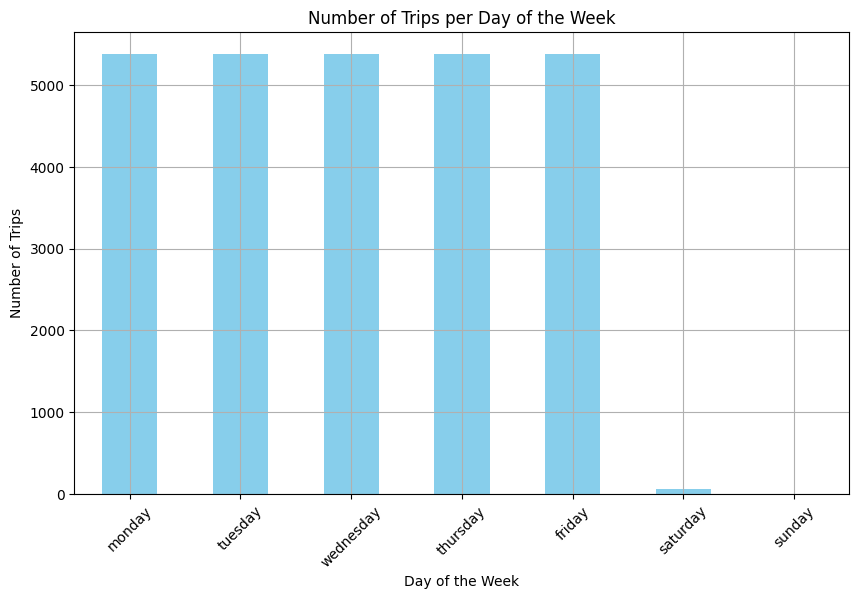

In [6]:
# merge trips with calendar to include the day of operation information
trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

# count the number of trips per day of the week
trip_counts = trips_calendar[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()

# Plotting
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The bar chart illustrates the number of trips scheduled for each day of the week for the Delhi Metro. As we can see, the number of trips from Monday to Friday is consistent, indicating a stable weekday schedule designed to accommodate regular commuter traffic. In contrast, the trips decrease slightly on Saturday and even more on Sunday, reflecting lower demand or a reduced service schedule on weekends.

This finding suggests that the Delhi Metro strategically scales its operations based on the expected daily ridership, which likely peaks during weekdays due to work and school commutes.

To further analyze the connectivity and effectiveness of the route strategy, I will analyze the distribution and connectivity of stops:

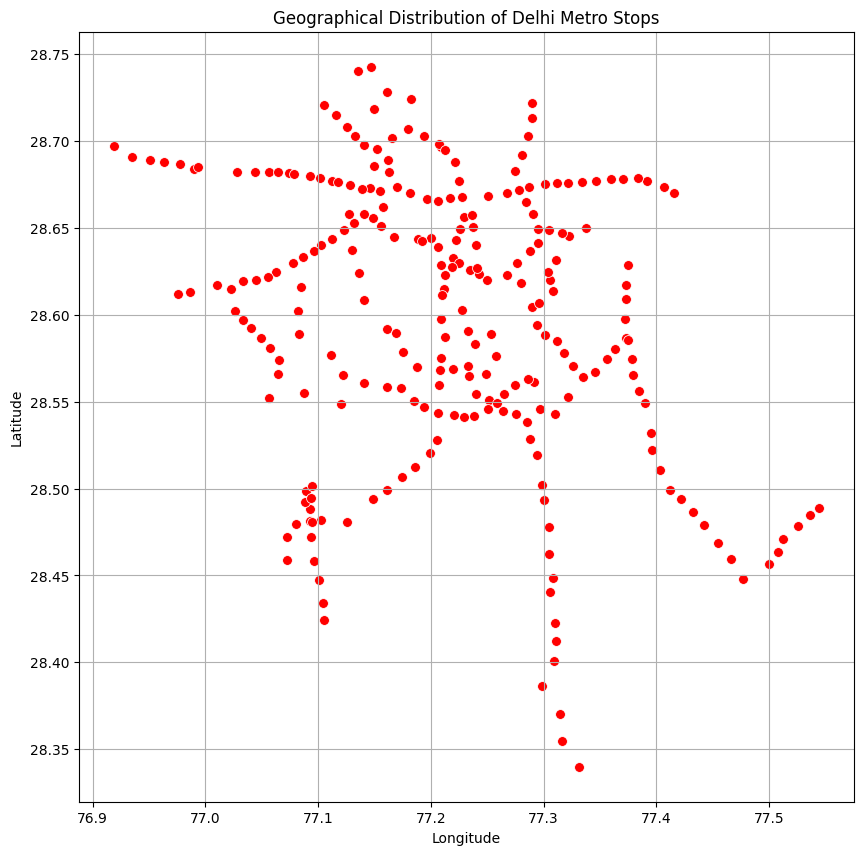

In [7]:
# plotting the locations of the stops
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', data=stops, color='red', s=50, marker='o')
plt.title('Geographical Distribution of Delhi Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

The scatter plot above shows the geographical distribution of Delhi Metro stops. Each red dot represents a metro stop, and their distribution across the map illustrates how the stops cover different areas of Delhi.
From the plot, we can see a widespread distribution, suggesting that the Delhi Metro provides good spatial coverage, allowing access to a broad area and facilitating efficient travel across the city.

The stops are fairly evenly spread, but there are denser clusters, which indicates areas with higher transit needs or central hubs that connect multiple lines.

Now, let’s analyze the route complexity. I will analyze how many routes pass through each stop, which can highlight key transfer points and central hubs within the Delhi Metro network:


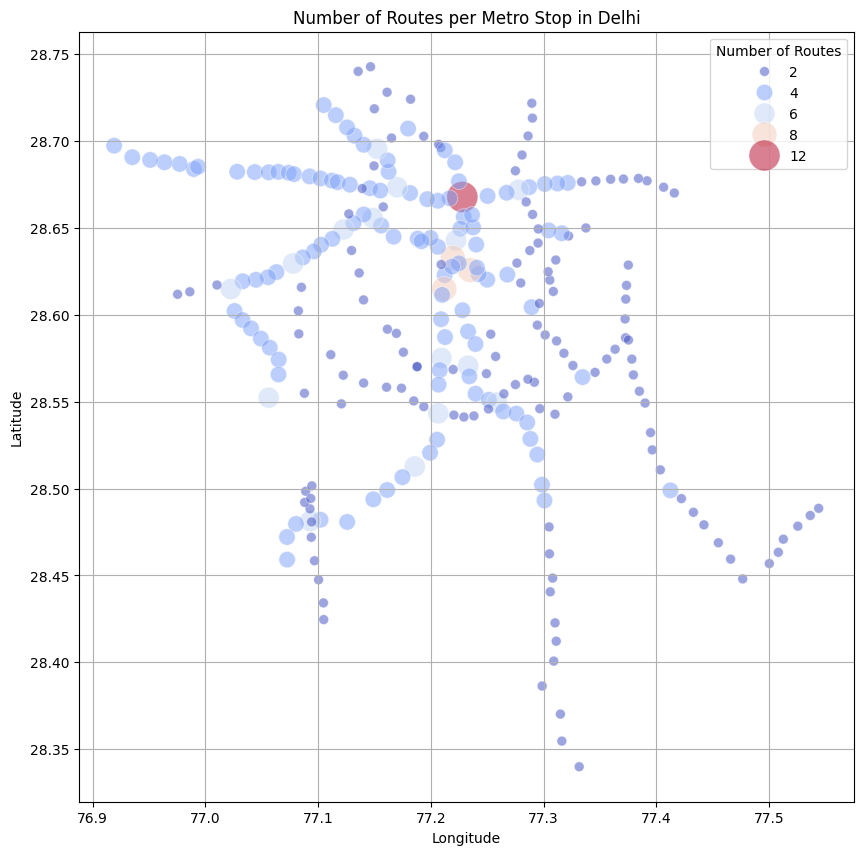

In [8]:
# merge stops with stop_times to link each stop with trips, and then merge with trips to get route information
stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')

# count how many unique routes pass through each stop
stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stop_route_counts = stop_route_counts.rename(columns={'route_id': 'number_of_routes'})

# merge this with stops to get the names and location for plotting
stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')

# plot the number of routes per stop
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                sizes=(50, 500), alpha=0.5, palette='coolwarm', data=stop_route_counts)
plt.title('Number of Routes per Metro Stop in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Routes')
plt.grid(True)
plt.show()

The scatter plot above represents the number of routes that pass through each Delhi Metro stop. Stops are visualized in different colours and sizes based on the number of routes they connect, providing insights into the complexity of the network at various locations. Key observations are:

Hubs and Transfer Points: Larger circles (in warmer colours) indicate stops where multiple routes intersect. These stops serve as major transfer points within the network, facilitating easier cross-city travel for passengers.
Distribution: Stops with fewer routes, shown in cooler colours and smaller sizes, tend to be more peripheral or on less busy lines. The central areas and more populated zones have stops with greater connectivity.
Next, let’s analyze the service frequency by examining the timing intervals between trips during different parts of the day. It will help us understand peak and off-peak operational strategies, which are crucial for managing commuter flow efficiently. Let’s calculate and visualize these intervals:

C:\Users\mahes\AppData\Local\Temp\ipykernel_30616\189162758.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
C:\Users\mahes\AppData\Local\Temp\ipykernel_30616\189162758.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')


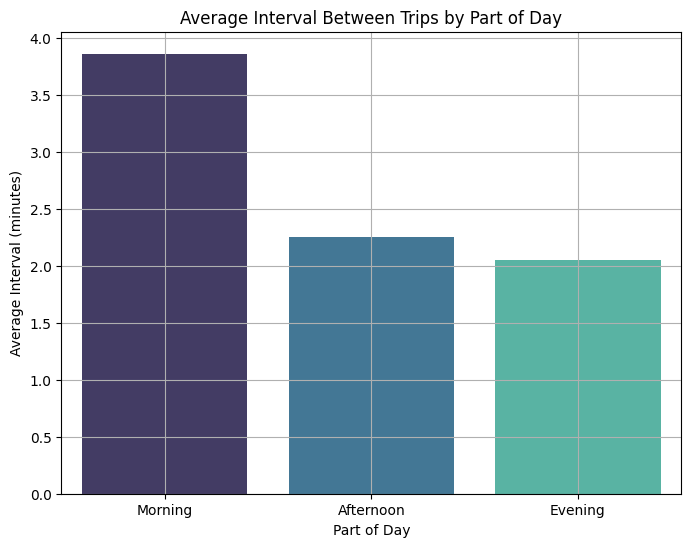

In [9]:
# converting stop_times 'arrival_time' from string to datetime.time for easier manipulation
import datetime as dt

# function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

stop_times['arrival_time_dt'] = stop_times['arrival_time'].apply(convert_to_time)

# calculate the difference in arrival times for subsequent trips at each stop
stop_times_sorted = stop_times.sort_values(by=['stop_id', 'arrival_time_dt'])
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

# function to calculate the difference in minutes between two times
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

# drop NaN values from intervals (last trip of the day)
stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes'])

# average intervals by time of day (morning, afternoon, evening)
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')
plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()

The bar chart above displays the average interval between trips on the Delhi Metro during different parts of the day: morning, afternoon, and evening. This data provides insight into the service frequency and how it is adjusted based on the expected demand throughout the day. Key findings are:
Morning: Shorter intervals between trips are observed in the morning hours, which likely corresponds to the morning rush hour when commuters are heading to work or school.
Afternoon: The intervals increase slightly during the afternoon, which may indicate a reduction in demand after the morning peak.
Evening: In the evening, intervals decrease again, likely to accommodate the evening rush hour as people return home.
Now, let’s calculate the number of trips and the available capacity per time interval. It will give us a basic understanding of how service levels vary throughout the day. We’ll classify the intervals as:

Early Morning: Before 6 AM
Morning Peak: 6 AM to 10 AM
Midday: 10 AM to 4 PM
Evening Peak: 4 PM to 8 PM
Late Evening: After 8 PM
Let’s calculate the supply in terms of trips during these time intervals using the stop_times data:



C:\Users\mahes\AppData\Local\Temp\ipykernel_30616\2563080614.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')


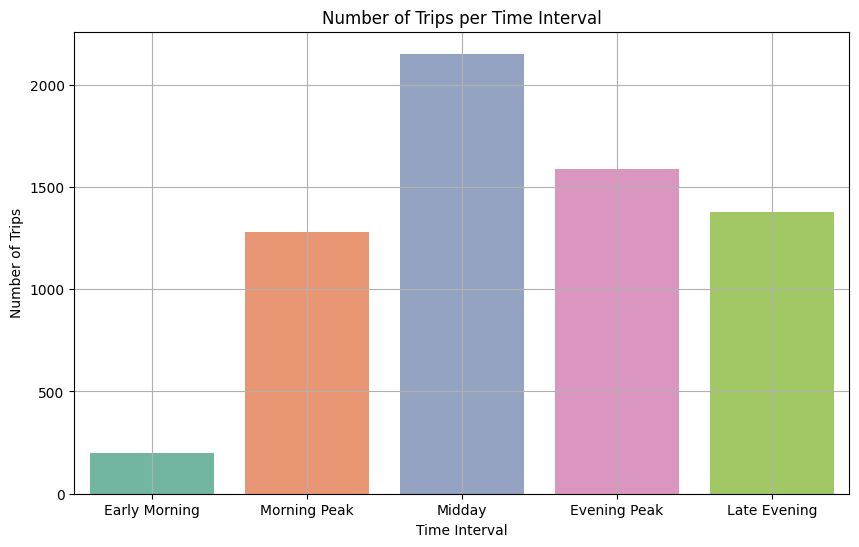

In [10]:
# define time intervals for classification
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'

# apply time interval classification
stop_times['time_interval'] = stop_times['arrival_time_dt'].apply(classify_time_interval)

# count the number of trips per time interval
trips_per_interval = stop_times.groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

# sorting the dataframe
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)
trips_per_interval = trips_per_interval.sort_values('time_interval')

# plotting the number of trips per time interval
plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

The bar chart displays the number of trips scheduled for each time interval in the Delhi Metro system. From this visualization, we can observe the following:

Early Morning: There is a relatively low number of trips, indicating less demand or fewer scheduled services during these hours.
Morning Peak: There is a significant increase in the number of trips compared to the early morning, likely due to morning commute hours as people travel to work or school.
Midday: The number of trips remains high, perhaps sustaining the morning rush or due to other midday travel needs.
Evening Peak: This period sees a slight decrease compared to midday but remains one of the busier times, probably reflecting the evening commute.
Late Evening: The number of trips drops again, but remains higher than in the early morning, likely catering to people returning home late or involved in evening activities.
Optimizing Operations to Reduce Overcrowding in Metro
Now, as we have analyzed the dataset, let’s build a data-driven strategy to reduce the overcrowding in Delhi Metro. To reduce the overcrowding in the Delhi Metro, we can adjust train frequencies based on time interval analysis.

We’ve already analyzed the number of trips during different time intervals, which provides a clear picture of the existing supply. By cross-referencing this data with inferred demand (e.g., crowd levels observed at platforms, as actual passenger data isn’t available), adjustments can be made. For instance, if certain time intervals like the morning or evening peaks show signs of overcrowding, increasing the number of trips or adjusting the timing of the trips could help alleviate this issue.

Let’s start with refining the frequencies of trains during peak and off-peak hours based on the trip frequency analysis we performed earlier. I’ll create a hypothetical scenario where we adjust the frequencies during these times based on assumed passenger loads. An assumption here is that morning and evening peaks need a 20% increase in service, while midday and late evening might handle a 10% reduction without impacting passenger service negatively.

Let’s calculate and visualize these adjustments:



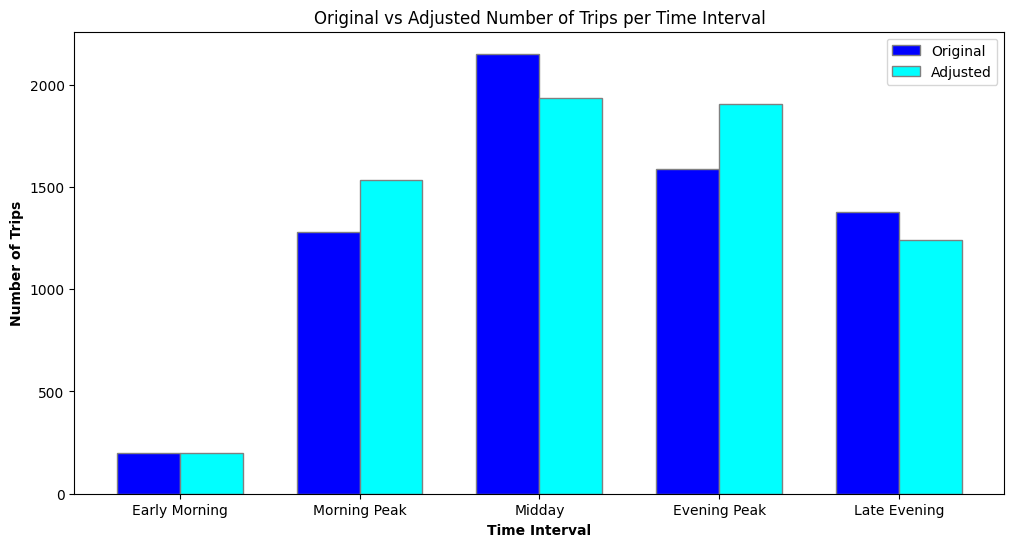

In [11]:
# adjusting frequencies based on hypothetical scenario
adjusted_trips_per_interval = trips_per_interval.copy()
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.90, 'Early Morning': 1.0, 'Late Evening': 0.90}

# apply the adjustments
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

# plotting original vs adjusted number of trips per time interval
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_trips_per_interval['number_of_trips'], color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], color='cyan', width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()

plt.show()

The bar chart illustrates the original versus adjusted number of trips per time interval for the Delhi Metro, based on our hypothetical adjustments to better align service levels with inferred demand:

Morning and Evening Peaks: We increased the number of trips by 20%, anticipating higher demand during these hours. This adjustment aims to reduce overcrowding and improve passenger comfort and service reliability.
Midday and Late Evening: We decreased the trips by 10%, assuming that the demand drops during these times, allowing for more efficient use of resources without significantly impacting service quality.
By implementing these adjustments, Delhi Metro can potentially improve operational efficiency and customer satisfaction, especially during peak hours.

Summary
Metro Operations Optimization refers to the systematic process of enhancing the efficiency, reliability, and effectiveness of Metro services through various data-driven techniques and operational adjustments. Our approach to optimizing metro operations showcases how analyzing existing data can guide decisions in real-time scheduling adjustments, even in the absence of explicit passenger count data.

